In [4]:
from TimeDelay_Neuron_DDF_GaussianForm import *
import numpy as np
import time
import matplotlib.pyplot as plt

In [5]:
A = np.load('NaKL_L63_DiffX_Driven_70k_02.npy')
Voltage = A[0]
Current = A[4]

In [8]:
tau = 3
D = 3
length = 25000
Xdata = Voltage
TT = 0.02
NoCenters = 5000

DDF = Gauss()
#Center = DDF.KmeanCenter(Xdata,NoCenters,D,length,tau)
Center = np.load('Centers_train25k_5k_D'+str(D)+'_tau'+str(tau)+'.npy')

In [9]:
stim = Current
Pdata = Voltage
PreLength = 25000
X = np.arange(0,PreLength*TT,TT)
beta,R = 1e1, 1e-1
bias = 50

F = DDF.FuncApproxF(Xdata,length,Center,beta,R,D,stim,tau)
PredValidation = DDF.PredictIntoTheFuture(F,PreLength,stim[bias-1:],Pdata[bias-1-(D-1)*tau:])

--- 23.256664276123047 seconds ---


<function matplotlib.pyplot.show(close=None, block=None)>

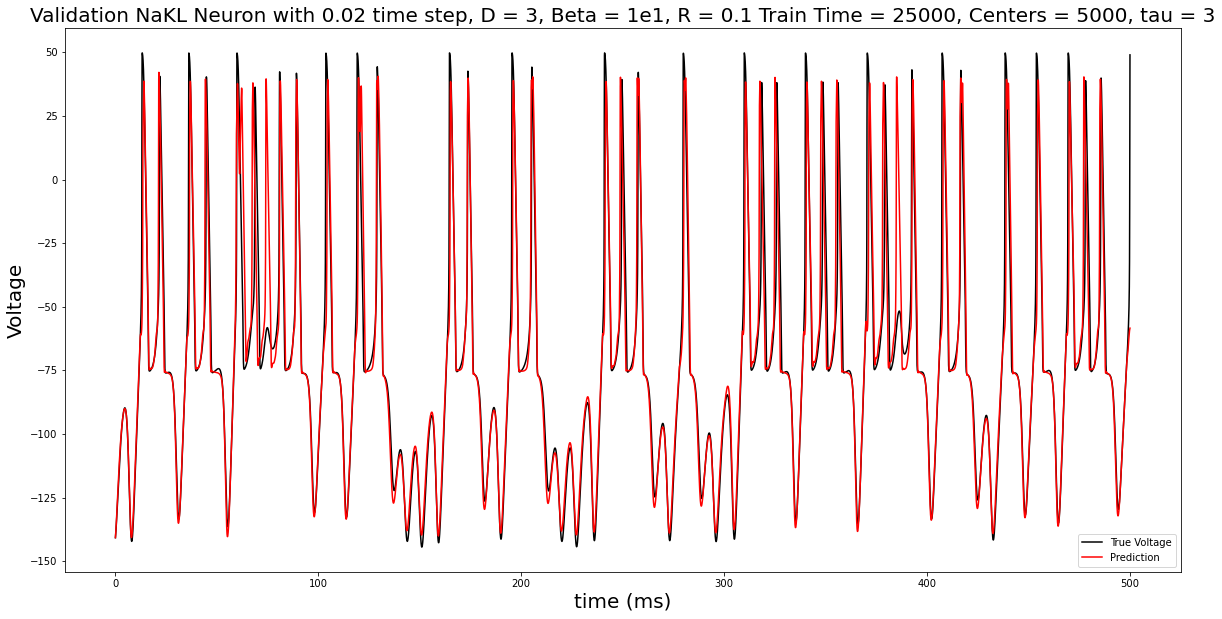

In [10]:
# Tau8
plt.figure(figsize=(20,10))
plt.plot(X,Pdata[bias:bias + PreLength],label = 'True Voltage', color = 'black')
plt.plot(X,PredValidation[tau*(D-1)+1:tau*(D-1)+PreLength+1],label = 'Prediction', color = 'r')
plt.xlabel('time (ms)',fontsize=20)
plt.ylabel('Voltage',fontsize=20)
plt.legend()
plt.title('Validation NaKL Neuron with 0.02 time step, D = 3, Beta = 1e1, R = 0.1 Train Time = 25000, Centers = 5000, tau = 3',fontsize=20)
#plt.savefig('Validation Prediction Result')
plt.show